In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_94d4a6dffaf245ab90fbbe166d176053.csv"
df=pd.read_csv(url)
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [2]:
df=df.drop(["MouseID","Genotype","Treatment","Behavior"],axis=1)
df.shape

(1080, 78)

In [3]:
missing=pd.DataFrame(df.isna().sum()/len(df),columns=["missing%"]).sort_values(by="missing%",ascending=False)
missing

,missing%
BCL2_N,0.263889
H3MeK4_N,0.250000
BAD_N,0.197222
EGR1_N,0.194444
H3AcK18_N,0.166667
...,...
ERBB4_N,0.000000
nNOS_N,0.000000
Tau_N,0.000000
GFAP_N,0.000000


In [4]:
len(missing[missing["missing%"]>0.2])

2

Drop the columns with mnore than 15% empty cells.

In [5]:
large_missing=missing[missing["missing%"]>0.2]
indices=large_missing.index.tolist()
indices

['BCL2_N', 'H3MeK4_N']

In [6]:
df=df.drop(indices,axis=1)
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.831557,0.188852,0.122652,0.106305,0.108336,0.427099,0.114783,0.131790,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.849270,0.200404,0.116682,0.106592,0.104315,0.441581,0.111974,0.135103,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.846709,0.193685,0.118508,0.108303,0.106219,0.435777,0.111883,0.133362,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.833277,0.192112,0.132781,0.103184,0.111262,0.391691,0.130405,0.147444,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.878668,0.205604,0.129954,0.104784,0.110694,0.434154,0.118481,0.140314,1.839730,c-CS-m


In [7]:
df=df.fillna(df.median())
df.isna().any()

DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
NR2A_N       False
             ...  
SYP_N        False
H3AcK18_N    False
EGR1_N       False
CaNA_N       False
class        False
Length: 76, dtype: bool

In [8]:
ccsm=df[df["class"]=="c-CS-m"]
ccss=df[df["class"]=="c-CS-s"]
cscm=df[df["class"]=="c-SC-m"]
cscs=df[df["class"]=="c-SC-s"]
df1=pd.concat([ccsm,ccss,cscm,cscs],axis=0)
df1.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.831557,0.188852,0.122652,0.106305,0.108336,0.427099,0.114783,0.131790,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.849270,0.200404,0.116682,0.106592,0.104315,0.441581,0.111974,0.135103,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.846709,0.193685,0.118508,0.108303,0.106219,0.435777,0.111883,0.133362,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.833277,0.192112,0.132781,0.103184,0.111262,0.391691,0.130405,0.147444,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.878668,0.205604,0.129954,0.104784,0.110694,0.434154,0.118481,0.140314,1.839730,c-CS-m


In [9]:
df1.shape

(570, 76)

In [10]:
tcsm=df[df["class"]=="t-CS-m"]
tcss=df[df["class"]=="t-CS-s"]
df2=pd.concat([tcsm,tcss],axis=0)
df2.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N,class
570,0.838053,1.006324,0.364953,2.603061,4.207680,0.202548,0.164055,2.222619,0.230776,2.099349,...,0.889599,0.207857,0.105862,0.111634,0.126523,0.400078,0.112587,0.107095,1.829242,t-CS-m
571,0.938245,1.077099,0.366149,2.703612,4.484228,0.197465,0.169923,2.289908,0.249214,2.149528,...,0.854487,0.196406,0.104193,0.110352,0.126523,0.402721,0.112256,0.105537,1.831980,t-CS-m
572,0.956488,1.108441,0.384049,2.662564,4.606357,0.203799,0.171625,2.311949,0.253610,2.097684,...,0.852623,0.192405,0.102238,0.106922,0.126523,0.403164,0.108300,0.114087,1.809744,t-CS-m
573,0.731738,0.944241,0.324365,2.320243,3.621250,0.198649,0.162240,2.257041,0.203458,1.758415,...,0.902992,0.202522,0.115779,0.104487,0.126523,0.388400,0.117319,0.115926,1.795498,t-CS-m
574,0.815503,1.005562,0.335976,2.379290,3.641657,0.217870,0.164142,2.291124,0.209941,1.951834,...,0.887361,0.205023,0.116227,0.104193,0.126523,0.374617,0.120861,0.110322,1.823529,t-CS-m


In [11]:
df2.shape

(240, 76)

In [25]:
X2=df2.drop(["class"],axis=1)
X2.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N
570,0.838053,1.006324,0.364953,2.603061,4.207680,0.202548,0.164055,2.222619,0.230776,2.099349,...,0.972540,0.889599,0.207857,0.105862,0.111634,0.126523,0.400078,0.112587,0.107095,1.829242
571,0.938245,1.077099,0.366149,2.703612,4.484228,0.197465,0.169923,2.289908,0.249214,2.149528,...,0.914842,0.854487,0.196406,0.104193,0.110352,0.126523,0.402721,0.112256,0.105537,1.831980
572,0.956488,1.108441,0.384049,2.662564,4.606357,0.203799,0.171625,2.311949,0.253610,2.097684,...,0.882551,0.852623,0.192405,0.102238,0.106922,0.126523,0.403164,0.108300,0.114087,1.809744
573,0.731738,0.944241,0.324365,2.320243,3.621250,0.198649,0.162240,2.257041,0.203458,1.758415,...,0.966051,0.902992,0.202522,0.115779,0.104487,0.126523,0.388400,0.117319,0.115926,1.795498
574,0.815503,1.005562,0.335976,2.379290,3.641657,0.217870,0.164142,2.291124,0.209941,1.951834,...,0.939831,0.887361,0.205023,0.116227,0.104193,0.126523,0.374617,0.120861,0.110322,1.823529


In [26]:
y2=df2[["class"]]
y2.head()

,class
570,t-CS-m
571,t-CS-m
572,t-CS-m
573,t-CS-m
574,t-CS-m


In [12]:
tcss=df[df["class"]=="t-CS-s"]
ccsm=df[df["class"]=="c-CS-m"]
ccss=df[df["class"]=="c-CS-s"]
df3=pd.concat([tcss,ccsm,ccss],axis=0)
df3.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N,class
840,0.506200,0.696046,0.316019,2.204591,4.154323,0.254859,0.180295,2.557473,0.192694,1.644772,...,0.666510,0.195062,0.153505,0.122126,0.126523,0.397663,0.155484,0.174935,1.357802,t-CS-s
841,0.523760,0.746212,0.324897,2.285640,4.322314,0.268767,0.194387,2.648244,0.198864,1.684917,...,0.675869,0.204601,0.153803,0.120845,0.126523,0.388920,0.164507,0.174935,1.327418,t-CS-s
842,0.518612,0.733233,0.356137,2.330148,4.631455,0.272468,0.186284,2.624078,0.192656,1.809524,...,0.644164,0.210940,0.156330,0.124680,0.126523,0.387212,0.156970,0.174935,1.267106,t-CS-s
843,0.436986,0.626614,0.295108,2.008023,3.605088,0.258317,0.183562,2.648141,0.194521,1.440900,...,0.669960,0.198849,0.178964,0.124812,0.126523,0.428589,0.187594,0.174935,1.329915,t-CS-s
844,0.505599,0.719826,0.314600,2.194110,3.908544,0.281833,0.200539,2.804231,0.210701,1.596433,...,0.659012,0.224074,0.182840,0.117407,0.126523,0.416420,0.182469,0.174935,1.297778,t-CS-s


In [13]:
df3.shape

(390, 76)

In [27]:
X3=df3.drop(["class"],axis=1)
X3.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,CaNA_N
840,0.506200,0.696046,0.316019,2.204591,4.154323,0.254859,0.180295,2.557473,0.192694,1.644772,...,1.284772,0.666510,0.195062,0.153505,0.122126,0.126523,0.397663,0.155484,0.174935,1.357802
841,0.523760,0.746212,0.324897,2.285640,4.322314,0.268767,0.194387,2.648244,0.198864,1.684917,...,1.204413,0.675869,0.204601,0.153803,0.120845,0.126523,0.388920,0.164507,0.174935,1.327418
842,0.518612,0.733233,0.356137,2.330148,4.631455,0.272468,0.186284,2.624078,0.192656,1.809524,...,1.215697,0.644164,0.210940,0.156330,0.124680,0.126523,0.387212,0.156970,0.174935,1.267106
843,0.436986,0.626614,0.295108,2.008023,3.605088,0.258317,0.183562,2.648141,0.194521,1.440900,...,1.262381,0.669960,0.198849,0.178964,0.124812,0.126523,0.428589,0.187594,0.174935,1.329915
844,0.505599,0.719826,0.314600,2.194110,3.908544,0.281833,0.200539,2.804231,0.210701,1.596433,...,1.268765,0.659012,0.224074,0.182840,0.117407,0.126523,0.416420,0.182469,0.174935,1.297778


In [28]:
y3=df3[["class"]]
y3.head()

,class
840,t-CS-s
841,t-CS-s
842,t-CS-s
843,t-CS-s
844,t-CS-s


In [14]:
X1=df1.drop(["class"],axis=1)
y1=df1[["class"]]

In [15]:
y1.groupby("class")["class"].count()

class
c-CS-m    150
c-CS-s    135
c-SC-m    150
c-SC-s    135
Name: class, dtype: int64

In [76]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X1, np.asarray(y1).reshape(y1.shape[0],))
features = fit.transform(X1)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
32,551.947046
74,307.531785
17,232.840366
65,205.483254
7,152.961970
...,...
51,1.704806
18,1.536773
58,0.653256
59,0.534899


In [77]:
X1_scores=scores[scores["scores"]>60]
len(X1_scores)

17

In [78]:
X1p=X1.iloc[:,X1_scores.index]
X1p.head()

,SOD1_N,CaNA_N,pPKCAB_N,Ubiquitin_N,pCAMKII_N,pNUMB_N,pGSK3B_N,IL1B_N,PKCA_N,P38_N,pS6_N,ARC_N,GSK3B_N,S6_N,SNCA_N,pERK_N,ERK_N
0,0.369510,1.675652,2.308745,1.044979,2.373744,0.394721,0.192608,0.430957,0.402698,0.335336,0.106305,0.106305,1.537227,0.354605,0.108234,0.687906,3.685247
1,0.342279,1.743610,2.043037,1.009883,2.292150,0.368255,0.194815,0.457156,0.385987,0.324835,0.106592,0.106592,1.509249,0.354548,0.109749,0.695006,3.485287
2,0.343696,1.926427,2.017984,0.996848,2.283337,0.363880,0.200737,0.510472,0.381002,0.324852,0.108303,0.108303,1.501244,0.386087,0.108196,0.677348,3.571456
3,0.344509,1.700563,2.132754,0.990225,2.152301,0.366771,0.184169,0.430996,0.377087,0.330121,0.103184,0.103184,1.419710,0.290680,0.119883,0.583277,2.970137
4,0.329126,1.839730,2.013697,0.997775,2.134014,0.351551,0.185718,0.481227,0.363502,0.313415,0.104784,0.104784,1.359876,0.309345,0.119524,0.550960,2.896334


In [79]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X1p=pd.DataFrame(scaler1.fit_transform(X1p),columns=X1p.columns)
X1p.head()

,SOD1_N,CaNA_N,pPKCAB_N,Ubiquitin_N,pCAMKII_N,pNUMB_N,pGSK3B_N,IL1B_N,PKCA_N,P38_N,pS6_N,ARC_N,GSK3B_N,S6_N,SNCA_N,pERK_N,ERK_N
0,-0.634245,1.099225,1.646765,-1.086307,-1.001105,0.489491,1.593135,-1.187282,1.767227,-1.194478,-1.280859,-1.280859,1.331218,-0.245927,-2.256723,0.347539,1.656325
1,-0.741800,1.311674,1.094858,-1.289439,-1.073301,0.117280,1.697183,-0.891637,1.419495,-1.327152,-1.259315,-1.259315,1.231019,-0.246387,-2.193711,0.365032,1.370651
2,-0.736203,1.883198,1.042820,-1.364886,-1.081099,0.055757,1.976391,-0.289977,1.315783,-1.326936,-1.130859,-1.130859,1.202346,0.011691,-2.258310,0.321527,1.493756
3,-0.732992,1.177102,1.281212,-1.403219,-1.197040,0.096413,1.195263,-1.186849,1.234311,-1.260365,-1.515221,-1.515221,0.910336,-0.769021,-1.771962,0.089752,0.634680
4,-0.793754,1.612167,1.033916,-1.359519,-1.213221,-0.117628,1.268285,-0.620009,0.951639,-1.471432,-1.395092,-1.395092,0.696047,-0.616282,-1.786895,0.010129,0.529241


In [108]:
y1.groupby("class")["class"].count()

class
c-CS-m    150
c-CS-s    135
c-SC-m    150
c-SC-s    135
Name: class, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1p,y1,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(427, 17)
(143, 17)


In [81]:
from sklearn import svm
model1=svm.SVC(C=5,random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model1

SVC(C=5, random_state=0)

In [82]:
from sklearn.metrics import accuracy_score
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  1.0


Confusion matrix for test data: 



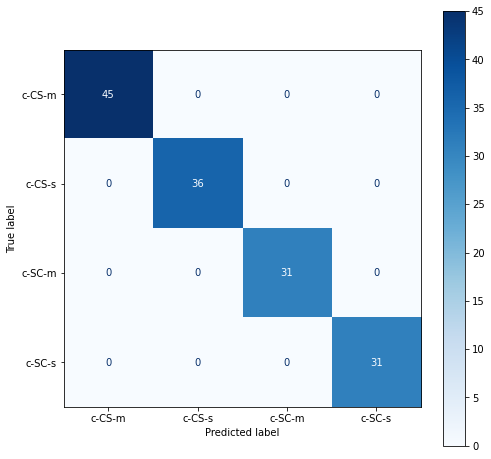

In [84]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [85]:
fit = test.fit(X2, np.asarray(y2).reshape(y2.shape[0],))
features = fit.transform(X2)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
43,89.066778
48,71.410664
58,58.773836
65,49.974020
56,44.936578
...,...
3,0.073465
5,0.042094
36,0.008445
68,0.000416


In [93]:
X2_scores=scores[scores["scores"]>20]
len(X2_scores)

19

In [94]:
X2p=X2.iloc[:,X2_scores.index]
X2p.head()

,NUMB_N,S6_N,GluR3_N,Ubiquitin_N,Tau_N,GFAP_N,P38_N,BRAF_N,SNCA_N,CDK5_N,P3525_N,ERK_N,CREB_N,ADARB1_N,nNOS_N,DYRK1A_N,pP70S6_N,AKT_N,pNUMB_N
570,0.190708,0.452925,0.228368,0.972540,0.194071,0.099922,0.310421,0.721015,0.117518,0.296907,0.288164,3.034186,0.179544,0.999159,0.205055,0.838053,0.214188,0.689671,0.294748
571,0.182353,0.450647,0.221600,0.914842,0.187783,0.101170,0.315639,0.786906,0.115559,0.293713,0.277028,3.235586,0.186410,0.975869,0.205756,0.938245,0.223673,0.705709,0.314400
572,0.179674,0.432925,0.224206,0.882551,0.189539,0.095459,0.332784,0.757632,0.115575,0.289793,0.272817,3.174048,0.190329,1.024306,0.200342,0.956488,0.229867,0.742029,0.317666
573,0.181845,0.381434,0.221513,0.966051,0.196436,0.107494,0.300893,0.631211,0.118566,0.297844,0.272107,2.527593,0.173460,0.949846,0.198783,0.731738,0.298603,0.582894,0.278452
574,0.182600,0.398386,0.227446,0.939831,0.192690,0.103520,0.296450,0.686864,0.112340,0.293819,0.269602,2.562249,0.177041,0.918679,0.201211,0.815503,0.320000,0.594675,0.288757


In [95]:
scaler2=StandardScaler()
X2p=pd.DataFrame(scaler2.fit_transform(X2p),columns=X2p.columns)
X2p.head()

,NUMB_N,S6_N,GluR3_N,Ubiquitin_N,Tau_N,GFAP_N,P38_N,BRAF_N,SNCA_N,CDK5_N,P3525_N,ERK_N,CREB_N,ADARB1_N,nNOS_N,DYRK1A_N,pP70S6_N,AKT_N,pNUMB_N
0,0.029022,-0.666853,0.475577,-1.265498,-0.339347,-1.604904,-0.393533,1.659787,-1.272231,-0.124149,-0.013096,0.893547,0.352599,-0.341315,1.321186,1.664548,-0.685122,0.834741,-1.183884
1,-0.242351,-0.687733,0.267143,-1.718770,-0.511220,-1.518112,-0.291434,2.140779,-1.363358,-0.218770,-0.395596,1.212897,0.681550,-0.399276,1.348903,2.306745,-0.635090,0.999925,-0.755622
2,-0.329355,-0.850112,0.347407,-1.972454,-0.463223,-1.915133,0.044023,1.927081,-1.362598,-0.334893,-0.540227,1.115320,0.869277,-0.278734,1.134733,2.423680,-0.602416,1.374022,-0.684439
3,-0.258842,-1.321927,0.264472,-1.316476,-0.274681,-1.078548,-0.579947,1.004225,-1.223525,-0.096369,-0.564618,0.090267,0.061153,-0.464039,1.073064,0.983097,-0.239855,-0.265039,-1.539026
4,-0.234330,-1.166602,0.447179,-1.522458,-0.377093,-1.354740,-0.666884,1.410484,-1.513054,-0.215626,-0.650686,0.145218,0.232727,-0.541604,1.169116,1.520006,-0.126992,-0.143705,-1.314444


In [96]:
X_train,X_test,y_train,y_test=train_test_split(X2p,y2,test_size=0.34,random_state=42)
print(X_train.shape)
print(X_test.shape)

(158, 19)
(82, 19)


In [97]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=1).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model2

KNeighborsClassifier(n_neighbors=1)

In [98]:
train_pred=model2.predict(X_train)
test_pred=model2.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  1.0


Confusion matrix for test data: 



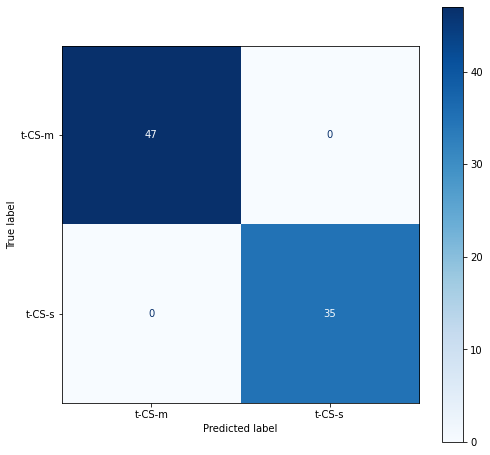

In [99]:
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [100]:
fit = test.fit(X3, np.asarray(y3).reshape(y3.shape[0],))
features = fit.transform(X3)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
34,126.386386
33,83.228797
38,76.737069
48,55.257473
40,48.600136
...,...
70,1.944747
49,1.517120
28,1.306765
62,0.397639


In [101]:
X3_scores=scores[scores["scores"]>16]
len(X3_scores)

27

In [102]:
X3p=X3.iloc[:,X3_scores.index]
X3p.head()

,P38_N,MTOR_N,NR2B_N,S6_N,RAPTOR_N,APP_N,Ubiquitin_N,pMTOR_N,AMPKA_N,IL1B_N,...,BDNF_N,BAX_N,pNUMB_N,pBRAF_N,pJNK_N,AcetylH3K9_N,NR1_N,NUMB_N,pS6_N,ARC_N
840,0.349866,0.457105,0.560824,0.658123,0.324062,0.438003,1.284772,0.708277,0.384383,0.466924,...,0.316019,0.198737,0.445543,0.180295,0.333613,0.222767,2.204591,0.191481,0.122126,0.122126
841,0.373623,0.489325,0.635158,0.640845,0.351928,0.460399,1.204413,0.742252,0.405303,0.453615,...,0.324897,0.202160,0.468320,0.194387,0.351412,0.212864,2.285640,0.192864,0.120845,0.120845
842,0.369551,0.483903,0.600604,0.572997,0.370054,0.461435,1.215697,0.790912,0.455902,0.465606,...,0.356137,0.207647,0.490443,0.186284,0.356137,0.200146,2.330148,0.190542,0.124680,0.124680
843,0.337769,0.420352,0.555969,0.633442,0.310568,0.402935,1.262381,0.666732,0.348337,0.478864,...,0.295108,0.188219,0.414090,0.183562,0.319765,0.213232,2.008023,0.181966,0.124812,0.124812
844,0.351307,0.438822,0.586686,0.616914,0.340730,0.428660,1.268765,0.725010,0.378059,0.487654,...,0.314600,0.195926,0.453961,0.200539,0.359394,0.201728,2.194110,0.184074,0.117407,0.117407


In [103]:
scaler3=StandardScaler()
X3p=pd.DataFrame(scaler3.fit_transform(X3p),columns=X3p.columns)
X3p.head()

,P38_N,MTOR_N,NR2B_N,S6_N,RAPTOR_N,APP_N,Ubiquitin_N,pMTOR_N,AMPKA_N,IL1B_N,...,BDNF_N,BAX_N,pNUMB_N,pBRAF_N,pJNK_N,AcetylH3K9_N,NR1_N,NUMB_N,pS6_N,ARC_N
0,-0.256203,0.233923,0.146981,1.334635,0.253071,0.624494,1.021472,-0.090156,0.102838,-0.274519,...,-0.296516,0.808038,0.822491,0.290234,0.557856,0.537764,-0.401554,-0.045066,0.523704,0.523704
1,0.139332,0.730608,0.945808,1.200306,0.784134,1.067078,0.443165,0.188798,0.407587,-0.452593,...,-0.123130,0.962110,1.181661,0.830609,0.880486,0.435706,-0.163235,-0.003961,0.429622,0.429622
2,0.071536,0.647033,0.574466,0.672808,1.129552,1.087547,0.524371,0.588329,1.144693,-0.292163,...,0.486989,1.209162,1.530525,0.519905,0.966132,0.304640,-0.032365,-0.073008,0.711302,0.711302
3,-0.457609,-0.332621,0.094799,1.142748,-0.004091,-0.068471,0.860336,-0.431273,-0.422276,-0.114762,...,-0.704910,0.334514,0.326504,0.415500,0.306857,0.439496,-0.979547,-0.327971,0.721040,0.721040
4,-0.232218,-0.047905,0.424901,1.014247,0.570723,0.439879,0.906280,0.047232,0.010706,0.002844,...,-0.324229,0.681472,0.955238,1.066518,1.025179,0.320944,-0.432372,-0.265295,0.177112,0.177112


In [104]:
X_train,X_test,y_train,y_test=train_test_split(X3p,y3,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)

(273, 27)
(117, 27)


In [105]:
model3=svm.SVC(C=2,random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model3

SVC(C=2, random_state=0)

In [106]:
train_pred=model3.predict(X_train)
test_pred=model3.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9914529914529915


Confusion matrix for test data: 



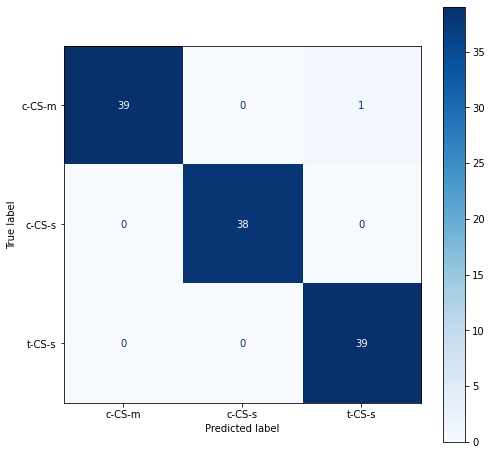

In [107]:
print("Confusion matrix for test data: \n")
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

#### Summary:

|Group|Classes|Model|Accuracy on test data|
|-----|-------|------|--------------------|
|1|c-CS-m,c-CS-s,c-SC-m,c-SC-s|Support Vector Machine with "rbf" kernel|100%|
|2|t-CS-m, t-CS-s|KNeighborsClassifier with K=1|100%|
|3|t-CS-s,c-CS-m,c-CS-s|Support Vector Machine with "rbf" kernel|99.15%|